In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# importing data

transaction_dataset= pd.read_csv("ccfd1.csv")
transaction_dataset.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0
5,5,21-06-2020 12:15,3.040000e+13,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,42.1939,-76.7361,520,Psychotherapist,13-10-1991,798db04aaceb4febd084f1a7c404da93,1.371817e+09,41.747157,-77.584197,0
6,6,21-06-2020 12:15,2.130000e+14,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,40.5070,-123.9743,1139,"Therapist, occupational",15-01-1951,17003d7ce534440eadb10c4750e020e5,1.371817e+09,41.499458,-124.888729,0
7,7,21-06-2020 12:15,3.590000e+15,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,43.7557,-97.5936,343,"Development worker, international aid",05-03-1972,8be473af4f05fc6146ea55ace73e7ca2,1.371817e+09,44.495498,-97.728453,1
8,8,21-06-2020 12:16,3.600000e+15,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,27-05-1973,71a1da150d1ce510193d7622e08e784e,1.371817e+09,41.546067,-78.120238,0
9,9,21-06-2020 12:16,3.550000e+15,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,31.6591,-96.8094,263,Barrister,30-05-1956,a7915132c7c4240996ba03a47f81e3bd,1.371817e+09,31.782919,-96.366185,0


In [3]:
# last 5 rows

transaction_dataset.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
49,49,21-06-2020 12:29,3.770000e+14,fraud_Friesen Ltd,health_fitness,5.36,Jackie,Davis,F,1898 Parker Fork Apt. 057,...,37.3272,-91.0243,241,Investment analyst,27-10-1974,0920f8e36028f404b48385209a995113,1.371818e+09,38.211238,-90.421871,0
50,50,21-06-2020 12:30,6.010000e+15,fraud_Champlin and Sons,home,80.50,Joshua,Cohen,M,426 Mark Ports,...,44.2541,-68.5565,824,"Loss adjuster, chartered",02-11-1974,c64caafcb8aaa4608fdba9f1ab53cbcc,1.371818e+09,44.959020,-69.150254,0
51,51,21-06-2020 12:37,8.010000e+13,fraud_Reilly LLC,home,9.99,Lisa,Davis,F,3333 Brooks boss,...,33.8767,-78.5656,6666,Exhibition,02-10-1975,fc78537e1af1f675c8713aa1a36f3c53,1.370000e+09,34.786780,-67.157700,1
52,52,21-06-2020 12:45,7.010000e+12,fraud_Friesen Ltd,food_dining,46.78,kitty,Allen,M,25055 Mark Walks,...,33.2322,-34.2222,8888,Musician,02-10-1979,fc72537e1af1f675c8713aa1a36f3c89,1.371818e+09,98.888800,-31.234213,0
53,53,21-06-2020 12:56,6.760000e+11,fraud_Reilly LLC,entertainment,53.11,lilly,White,F,426 Mark Ports,...,22.2222,-51.5252,8765,Web designer,02-10-1969,4ffb7174155b877c4d18d1d86e71e823,1.371818e+10,67.524320,-23.456782,1


In [4]:
# check shape of dataset

transaction_dataset.shape


(54, 23)

In [5]:
# dataset information 

transaction_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             54 non-null     int64  
 1   trans_date_trans_time  54 non-null     object 
 2   cc_num                 54 non-null     float64
 3   merchant               54 non-null     object 
 4   category               54 non-null     object 
 5   amt                    54 non-null     float64
 6   first                  54 non-null     object 
 7   last                   54 non-null     object 
 8   gender                 54 non-null     object 
 9   street                 54 non-null     object 
 10  city                   54 non-null     object 
 11  state                  54 non-null     object 
 12  zip                    54 non-null     int64  
 13  lat                    54 non-null     float64
 14  long                   54 non-null     float64
 15  city_pop

In [6]:
# dataset datatype

transaction_dataset.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                float64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [7]:
# mathematical values of dataset

transaction_dataset.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,54.000000,5.400000e+01,54.000000,54.000000,54.000000,54.000000,5.400000e+01,5.400000e+01,54.000000,54.000000,54.000000
mean,26.500000,3.436821e+17,40.606111,47227.277778,36.896791,-86.951635,1.083798e+05,1.600420e+09,39.099008,-86.128080,0.166667
std,15.732133,1.221163e+18,46.689492,26875.819226,5.618208,15.094439,3.148409e+05,1.680132e+09,10.593057,17.091577,0.376177
min,0.000000,5.020000e+11,1.700000,4616.000000,22.222200,-123.974300,1.000000e+02,1.370000e+09,24.306325,-124.888729,0.000000
25%,13.250000,1.800000e+14,6.067500,29409.000000,32.690850,-93.248850,8.405000e+02,1.371817e+09,33.185568,-93.829302,0.000000
50%,26.500000,2.500000e+15,25.520000,46682.500000,38.543900,-85.695550,4.340500e+03,1.371817e+09,39.453578,-86.005649,0.000000
75%,39.750000,4.852500e+15,51.560000,70800.250000,41.169250,-78.968000,4.969925e+04,1.371818e+09,41.534415,-78.493968,0.000000
max,53.000000,4.910000e+18,210.360000,95528.000000,45.496300,-34.222200,1.595797e+06,1.371818e+10,98.888800,-23.456782,1.000000


In [8]:
#finding null values in dataset

transaction_dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [9]:
# total null values in all rows and columns

transaction_dataset.isnull().sum().sum()

0

In [10]:
# distribution of legit transaction and fraudulent transaction

transaction_dataset['is_fraud'].value_counts()

# data is highly unbalanced 

0    45
1     9
Name: is_fraud, dtype: int64

In [11]:
#0 : Normal transaction,1 : Fraudulent transaction

legit = transaction_dataset[transaction_dataset.is_fraud == 0]
fraud = transaction_dataset[transaction_dataset.is_fraud == 1]

In [12]:

print("Shape of legit : ", legit.shape)
print("Shape of fraud : ", fraud.shape)

Shape of legit :  (45, 23)
Shape of fraud :  (9, 23)


In [13]:
# measures

legit.amt.describe()

count     45.000000
mean      39.760444
std       45.812283
min        1.700000
25%        6.020000
50%       26.310000
75%       47.810000
max      210.360000
Name: amt, dtype: float64

In [14]:
fraud.amt.describe()
# fraud transaction description

count      9.000000
mean      44.834444
std       53.614824
min        2.170000
25%        9.990000
50%       16.600000
75%       53.110000
max      134.600000
Name: amt, dtype: float64

In [15]:
# comparing the values for both transaction 

transaction_dataset.groupby('is_fraud').mean()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,
0,25.6,3.029729e+17,39.760444,46758.666667,37.667229,-87.717356,117289.444444,1.371817e+09,39.225846,-87.593179
1,31.0,5.472279e+17,44.834444,49570.333333,33.044600,-83.123033,63831.777778,2.743433e+09,38.464819,-78.802587


In [16]:
ligit_sample = transaction_dataset.sample(n = 9)

In [17]:
new_transaction_dataset2 = pd.concat([ligit_sample, fraud], axis = 0)

In [18]:
new_transaction_dataset2.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
36,36,21-06-2020 12:27,4.680000e+15,fraud_Schiller Ltd,personal_care,26.31,Charles,Carrillo,M,17547 Stephen Turnpike Apt. 846,...,33.9143,-118.3493,93193,"Editor, magazine features",19-04-1995,e91e10ae4ad160e1aee1054ea96de9ba,1.371818e+09,33.949418,-117.610248,0
34,34,21-06-2020 12:26,1.800000e+14,fraud_Lynch-Wisozk,home,52.81,Krystal,Gamble,F,47152 Clayton Burg,...,39.6747,-76.8941,11751,Clinical research associate,15-02-1964,0ad27a9cf7fcb1e0774a86709cb248f1,1.371818e+09,39.289186,-77.113659,0
24,24,21-06-2020 12:21,3.730000e+14,"fraud_Watsica, Haag and Considine",shopping_pos,9.87,Kristen,Hanson,F,26544 Andrea Glen,...,42.9147,-83.4845,6951,Learning disability nurse,18-06-1985,df862b772cfb9ca0d621c259df11a652,1.371817e+09,43.702833,-83.750248,0
30,30,21-06-2020 12:25,3.800000e+14,fraud_Kautzer and Sons,personal_care,176.23,Frank,Key,M,5537 Jessica Plaza,...,38.3039,-85.4834,3263,Stage manager,28-02-1930,3f5587dd43e45910ba221bc3a4dfdd3f,1.371818e+09,38.585316,-86.108185,0
8,8,21-06-2020 12:16,3.600000e+15,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,41.0001,-78.2357,3688,Advice worker,27-05-1973,71a1da150d1ce510193d7622e08e784e,1.371817e+09,41.546067,-78.120238,0


In [19]:
new_transaction_dataset2['is_fraud'].value_counts()

0    9
1    9
Name: is_fraud, dtype: int64

In [20]:
new_transaction_dataset2.groupby('is_fraud').mean()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long
is_fraud,,,,,,,,,,
0,29.888889,1.751643e+15,43.231111,49503.888889,38.775422,-83.921733,14627.777778,1.371817e+09,46.302070,-83.622025
1,31.000000,5.472279e+17,44.834444,49570.333333,33.044600,-83.123033,63831.777778,2.743433e+09,38.464819,-78.802587


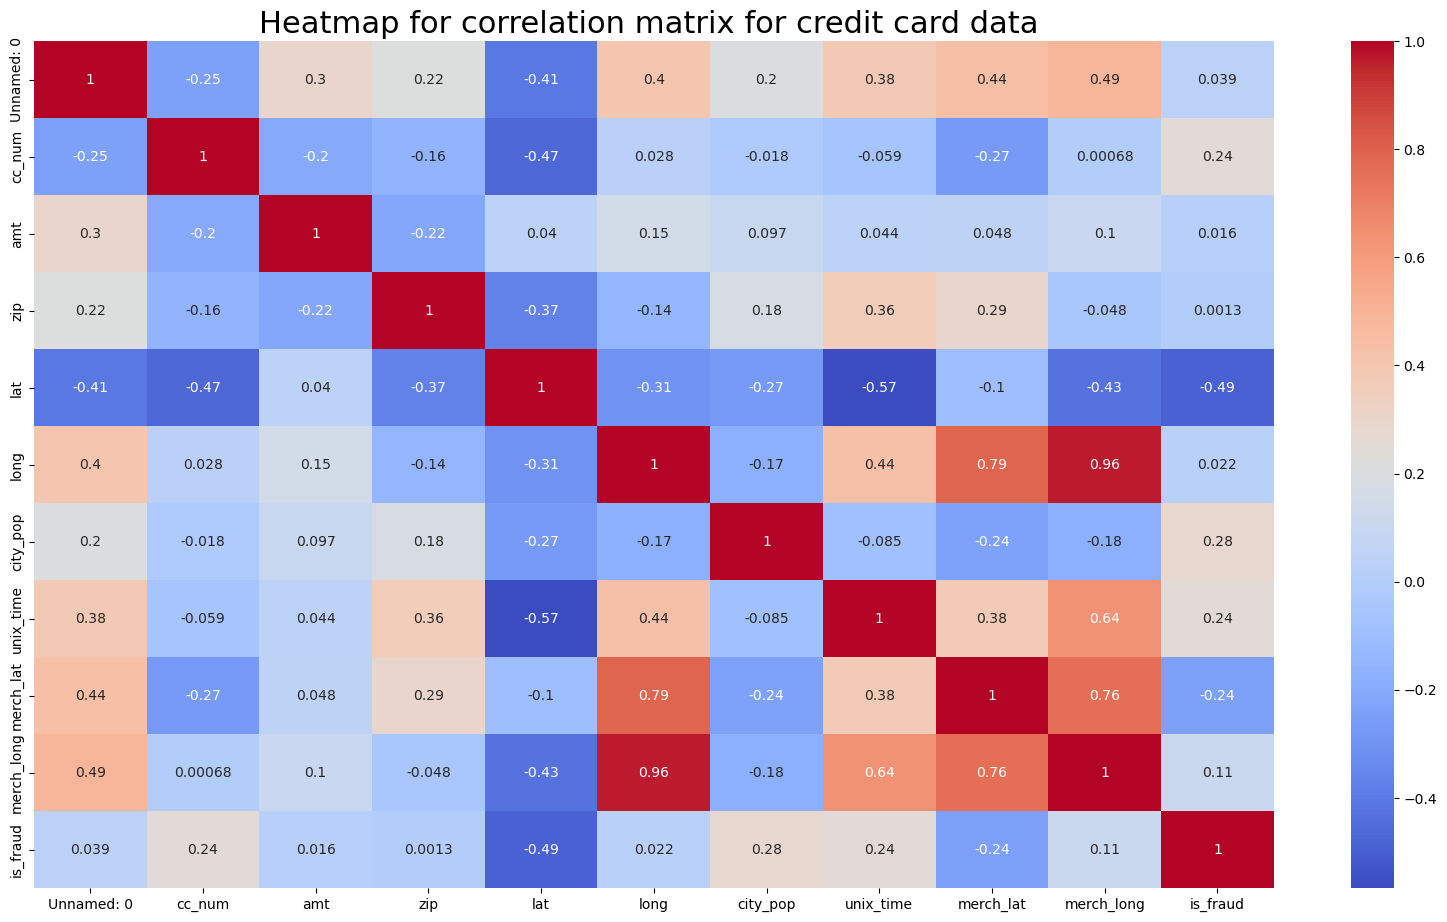

In [21]:
plt.figure(figsize = (20,11))
# heatmap size in ration 16:9

sns.heatmap(new_transaction_dataset2.corr(), annot = True, cmap = 'coolwarm')
# heatmap parameters

plt.title("Heatmap for correlation matrix for credit card data ", fontsize = 22)
plt.show()

C:\Users\bhava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_fraud', ylabel='count'>

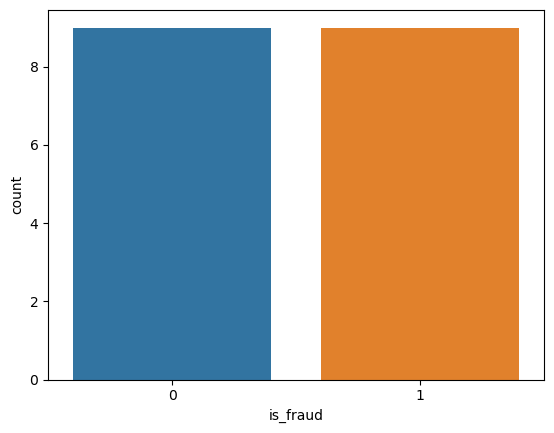

In [22]:
sns.countplot(new_transaction_dataset2.is_fraud)

In [24]:
X = new_transaction_dataset2.drop(columns = 'is_fraud', axis = 1)
Y = new_transaction_dataset2['is_fraud']
Y

36    0
34    0
24    0
30    0
8     0
52    0
43    0
10    0
32    0
7     1
16    1
17    1
27    1
31    1
37    1
40    1
51    1
53    1
Name: is_fraud, dtype: int64

In [25]:
X

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long
36,36,21-06-2020 12:27,4.680000e+15,fraud_Schiller Ltd,personal_care,26.31,Charles,Carrillo,M,17547 Stephen Turnpike Apt. 846,...,90250,33.9143,-118.3493,93193,"Editor, magazine features",19-04-1995,e91e10ae4ad160e1aee1054ea96de9ba,1.371818e+09,33.949418,-117.610248
34,34,21-06-2020 12:26,1.800000e+14,fraud_Lynch-Wisozk,home,52.81,Krystal,Gamble,F,47152 Clayton Burg,...,21102,39.6747,-76.8941,11751,Clinical research associate,15-02-1964,0ad27a9cf7fcb1e0774a86709cb248f1,1.371818e+09,39.289186,-77.113659
24,24,21-06-2020 12:21,3.730000e+14,"fraud_Watsica, Haag and Considine",shopping_pos,9.87,Kristen,Hanson,F,26544 Andrea Glen,...,48438,42.9147,-83.4845,6951,Learning disability nurse,18-06-1985,df862b772cfb9ca0d621c259df11a652,1.371817e+09,43.702833,-83.750248
30,30,21-06-2020 12:25,3.800000e+14,fraud_Kautzer and Sons,personal_care,176.23,Frank,Key,M,5537 Jessica Plaza,...,40056,38.3039,-85.4834,3263,Stage manager,28-02-1930,3f5587dd43e45910ba221bc3a4dfdd3f,1.371818e+09,38.585316,-86.108185
8,8,21-06-2020 12:16,3.600000e+15,"fraud_Goyette, Howell and Collier",shopping_pos,4.37,David,Everett,M,4138 David Fall,...,16858,41.0001,-78.2357,3688,Advice worker,27-05-1973,71a1da150d1ce510193d7622e08e784e,1.371817e+09,41.546067,-78.120238
52,52,21-06-2020 12:45,7.010000e+12,fraud_Friesen Ltd,food_dining,46.78,kitty,Allen,M,25055 Mark Walks,...,70777,33.2322,-34.2222,8888,Musician,02-10-1979,fc72537e1af1f675c8713aa1a36f3c89,1.371818e+09,98.888800,-31.234213
43,43,21-06-2020 12:29,4.780000e+12,"fraud_Fadel, Mertz and Rippin",entertainment,46.67,Jessica,Garcia,F,13108 Jennifer Passage,...,67556,38.5957,-99.5540,320,Film/video editor,22-04-1961,822cd909aeb6a351637b5f9ba9866f19,1.371818e+09,39.456658,-99.569786
10,10,21-06-2020 12:16,2.240000e+15,"fraud_Feil, Hilpert and Koss",food_dining,7.01,Samuel,Jenkins,M,43235 Mckenzie Views Apt. 837,...,40077,38.4921,-85.4524,564,Pensions consultant,10-04-1996,3b8e4d02d9e1a3bf97cf449eb0317f2c,1.371817e+09,38.977546,-84.727994
32,32,21-06-2020 12:26,4.300000e+15,"fraud_Zemlak, Tillman and Cremin",personal_care,19.03,Daniel,Cain,M,384 Newman Forks Apt. 370,...,50421,42.8511,-93.6200,3032,Community pharmacist,08-08-1964,cd10a7d08e9262899109c06a8e180302,1.371818e+09,42.322809,-94.363655
7,7,21-06-2020 12:15,3.590000e+15,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,57374,43.7557,-97.5936,343,"Development worker, international aid",05-03-1972,8be473af4f05fc6146ea55ace73e7ca2,1.371817e+09,44.495498,-97.728453


In [26]:
Y

36    0
34    0
24    0
30    0
8     0
52    0
43    0
10    0
32    0
7     1
16    1
17    1
27    1
31    1
37    1
40    1
51    1
53    1
Name: is_fraud, dtype: int64

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)

In [28]:
print("Shape of X_train ", X_train.shape)
print("Shape of X_test ", X_test.shape)
print("Shape of Y_train ", Y_train.shape)
print("Shape of Y_test ", Y_test.shape)

Shape of X_train  (14, 22)
Shape of X_test  (4, 22)
Shape of Y_train  (14,)
Shape of Y_test  (4,)


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
transaction_dataset= pd.read_csv("ccfd1.csv")
legit = transaction_dataset[transaction_dataset.is_fraud == 0]
fraud = transaction_dataset[transaction_dataset.is_fraud == 1]
ligit_sample = transaction_dataset.sample(n = 9)
new_transaction_dataset2 = pd.concat([ligit_sample, fraud], axis = 0)
X = new_transaction_dataset2.drop(columns = 'is_fraud', axis = 1)
Y = new_transaction_dataset2['is_fraud']

xTrain, xTest, yTrain, yTest = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state = 2)

In [30]:
print("Shape of X_train ", xTrain.shape)
print("Shape of X_test ", xTest.shape)
print("Shape of Y_train ", yTrain.shape)
print("Shape of Y_test ", yTest.shape)

Shape of X_train  (14, 22)
Shape of X_test  (4, 22)
Shape of Y_train  (14,)
Shape of Y_test  (4,)
